In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_plot import plot_mean_std, plot_all_roc_curves, plot_all_pr_curves, plot_all_comparisons

python inference.py --dataset_location data/nacc_scaled_corrected.csv --dataset_id nacc

python inference.py --dataset_location data/nacc_scaled_corrected.csv --dataset_id nacc --do_single_pass

In [2]:
nacc_diag = pd.read_csv('../data/nacc_diagnosis.csv', index_col=0)
nacc_diag.shape

(5209, 1)

In [3]:
res_df = pd.read_csv('latest_output_nacc_50.csv', index_col=0)
res_df

,mean,std
nacc_id,,
34,0.754137,0.190174
225,0.933381,0.085771
511,0.467415,0.259353
531,0.497308,0.269715
920,0.025401,0.038529
...,...,...
999346,0.985245,0.023443
999546,0.189503,0.176066
999566,0.399080,0.229956


In [4]:
joined_df = res_df.join(nacc_diag, how='inner')
joined_df

,mean,std,diagnosis
nacc_id,,,
34,0.754137,0.190174,AD
225,0.933381,0.085771,OD
511,0.467415,0.259353,AD
531,0.497308,0.269715,OD
920,0.025401,0.038529,Control
...,...,...,...
999346,0.985245,0.023443,AD
999546,0.189503,0.176066,Control
999566,0.399080,0.229956,OND


In [5]:
joined_df['diagnosis'] = joined_df['diagnosis'].map({'AD': 1, 'OD': 0, 'Control': 0, 'OND': 0})
joined_df

,mean,std,diagnosis
nacc_id,,,
34,0.754137,0.190174,1
225,0.933381,0.085771,0
511,0.467415,0.259353,1
531,0.497308,0.269715,0
920,0.025401,0.038529,0
...,...,...,...
999346,0.985245,0.023443,1
999546,0.189503,0.176066,0
999566,0.399080,0.229956,0


In [6]:
single_pass = pd.read_csv('latest_output_nacc_1.csv', index_col=0)
single_pass = single_pass.join(nacc_diag, how='inner')
single_pass['diagnosis'] = single_pass['diagnosis'].map({'AD': 1, 'OD': 0, 'Control': 0, 'OND': 0})
single_pass

,mean,std,diagnosis
nacc_id,,,
34,0.846376,NaN,1
225,0.983831,NaN,0
511,0.462805,NaN,1
531,0.617238,NaN,0
920,0.006656,NaN,0
...,...,...,...
999346,0.997336,NaN,1
999546,0.083502,NaN,0
999566,0.358801,NaN,0


In [7]:
# Creating column of extremes to better evaluate distance to extremes and order
joined_df['extremes'] = joined_df['mean']
joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes'] = 1 - joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes']
joined_df

,mean,std,diagnosis,extremes
nacc_id,,,,
34,0.754137,0.190174,1,0.245863
225,0.933381,0.085771,0,0.066619
511,0.467415,0.259353,1,0.467415
531,0.497308,0.269715,0,0.497308
920,0.025401,0.038529,0,0.025401
...,...,...,...,...
999346,0.985245,0.023443,1,0.014755
999546,0.189503,0.176066,0,0.189503
999566,0.399080,0.229956,0,0.399080


In [8]:
single_pass['extremes'] = single_pass['mean']
single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes'] = 1 - single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes']
single_pass

,mean,std,diagnosis,extremes
nacc_id,,,,
34,0.846376,NaN,1,0.153624
225,0.983831,NaN,0,0.016169
511,0.462805,NaN,1,0.462805
531,0.617238,NaN,0,0.382762
920,0.006656,NaN,0,0.006656
...,...,...,...,...
999346,0.997336,NaN,1,0.002664
999546,0.083502,NaN,0,0.083502
999566,0.358801,NaN,0,0.358801


## MC-Drop vs single-pass: AUC-ROC Curve

Best treshold for MC-Drop: 0.5115083456039429
Best treshold for Single Pass: 0.5894964933395386


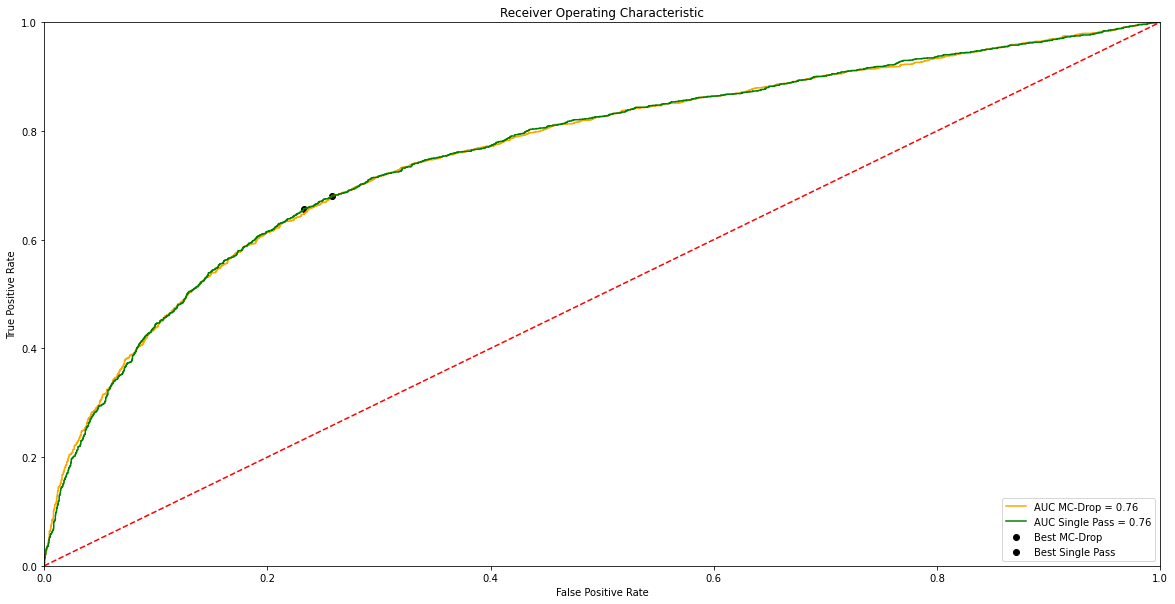

In [9]:
plot_all_roc_curves(joined_df, single_pass)

# MC-Drop (uncertainty) vs MC-Drop (delta) vs single-pass (delta)

## At threshold = 0.5

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


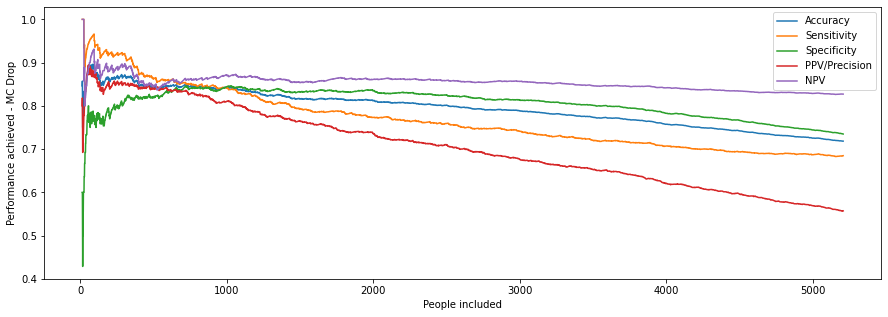

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


/local/sdc/tmla2/adni_phenotypes/results/utils_plot.py:99: RuntimeWarning: invalid value encountered in long_scalars
  npv = tn / (tn + fn)


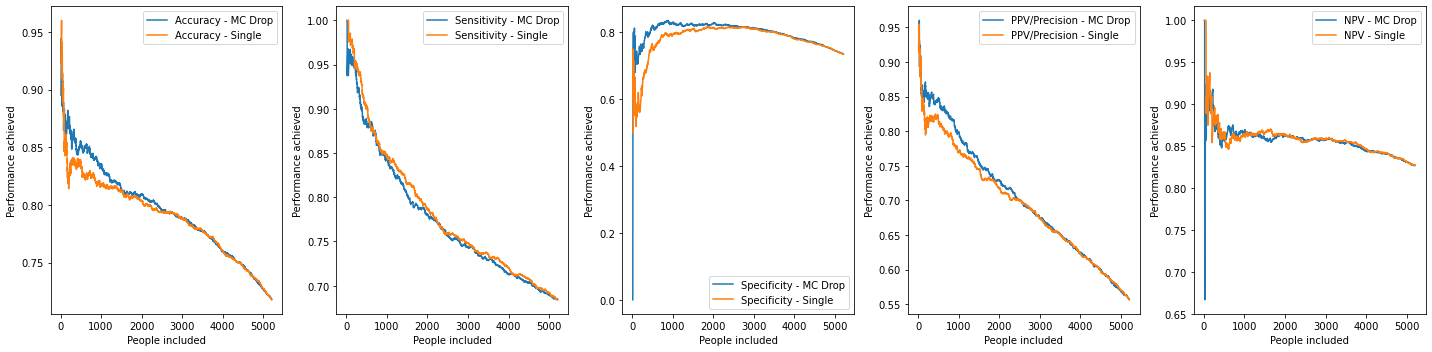

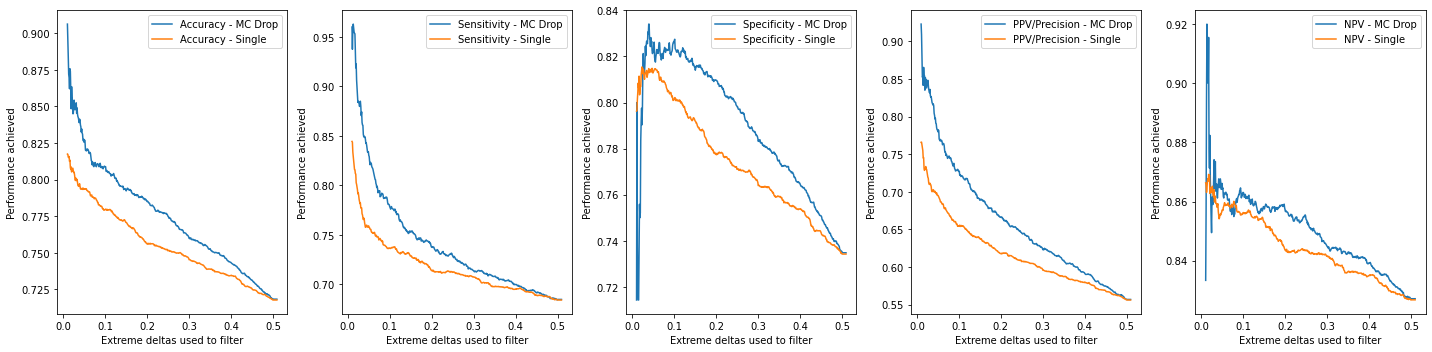

#####################################################################################
################# All 3 approaches together
#####################################################################################


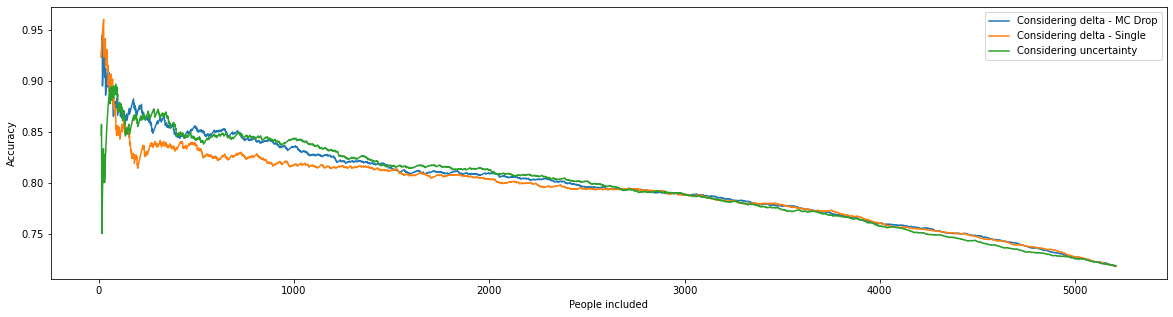

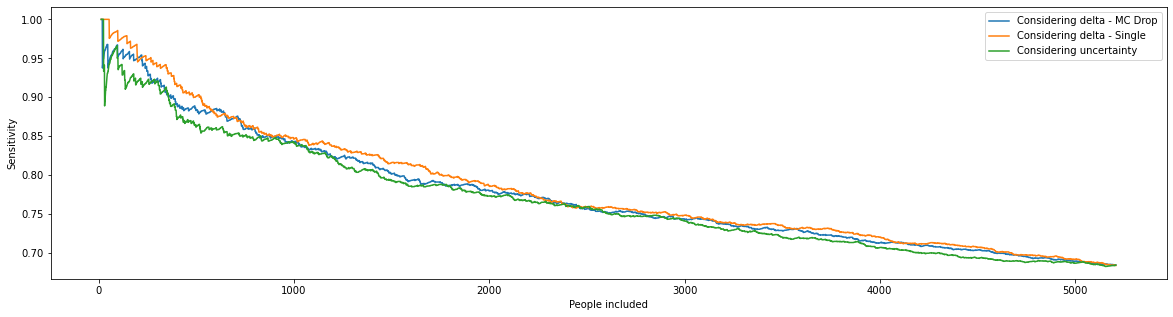

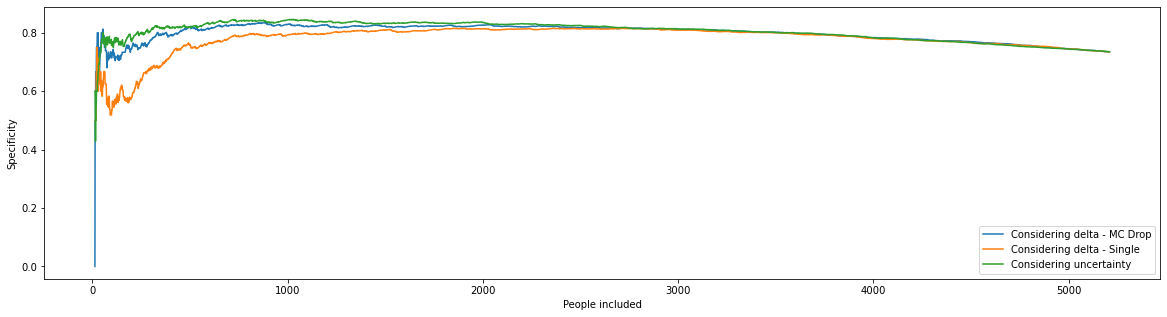

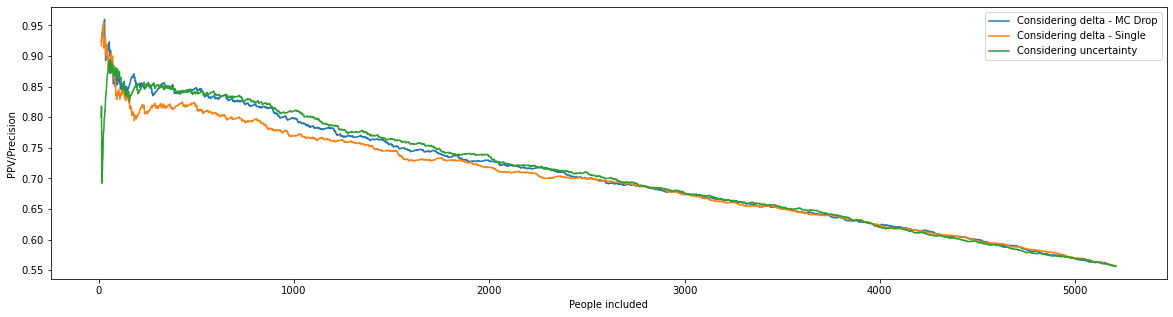

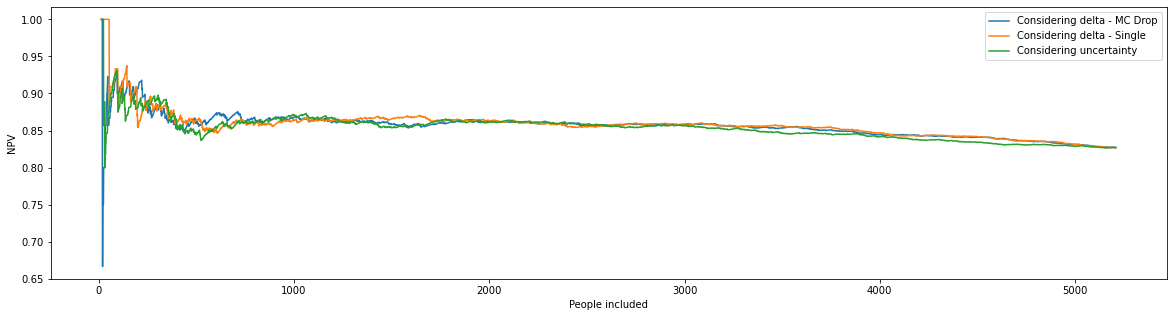

CPU times: user 1min 55s, sys: 96 ms, total: 1min 55s
Wall time: 1min 55s


In [10]:
%%time
plot_all_comparisons(joined_df, single_pass, threshold=0.5, starting_num_people=13)

## At threshold = 0.582169

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


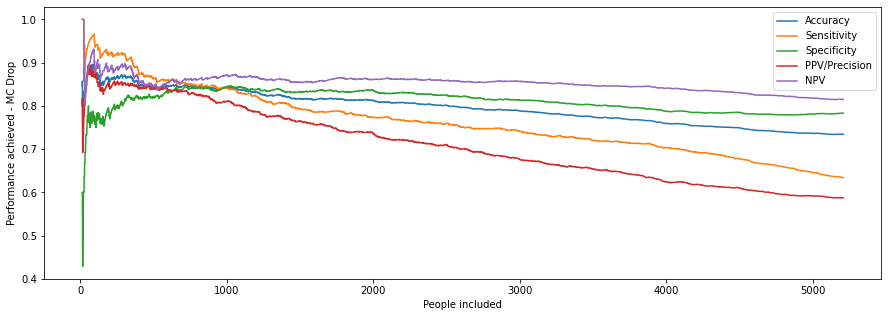

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


/local/sdc/tmla2/adni_phenotypes/results/utils_plot.py:99: RuntimeWarning: invalid value encountered in long_scalars
  npv = tn / (tn + fn)


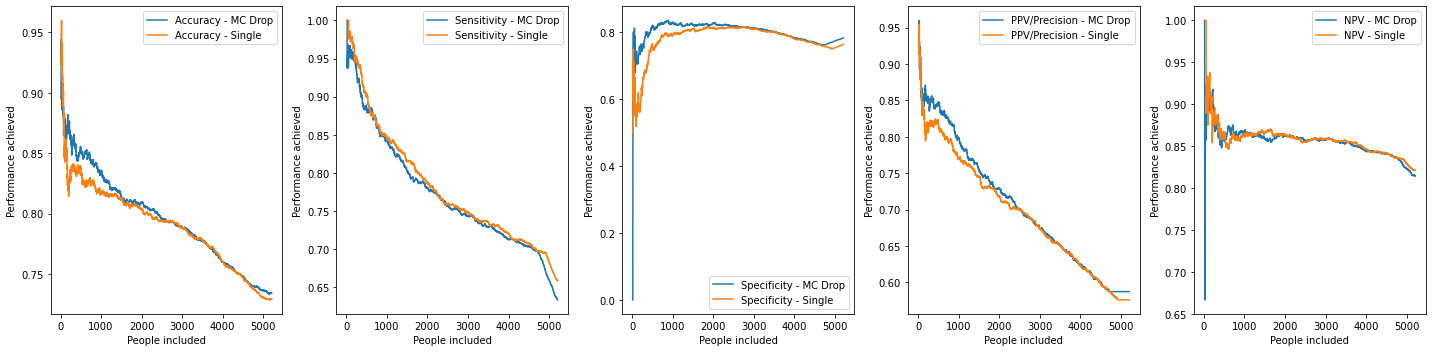

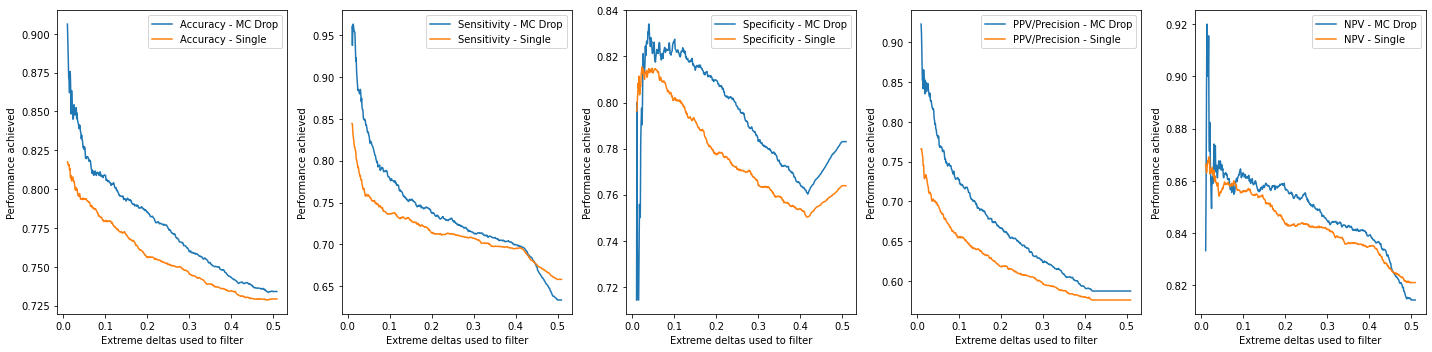

#####################################################################################
################# All 3 approaches together
#####################################################################################


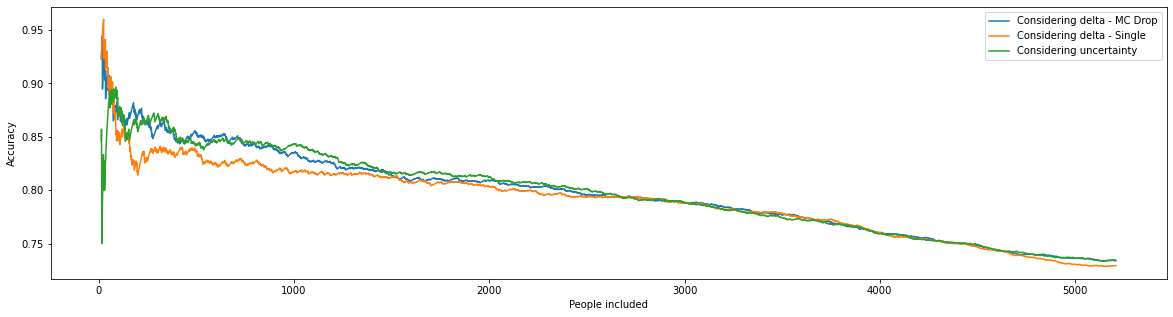

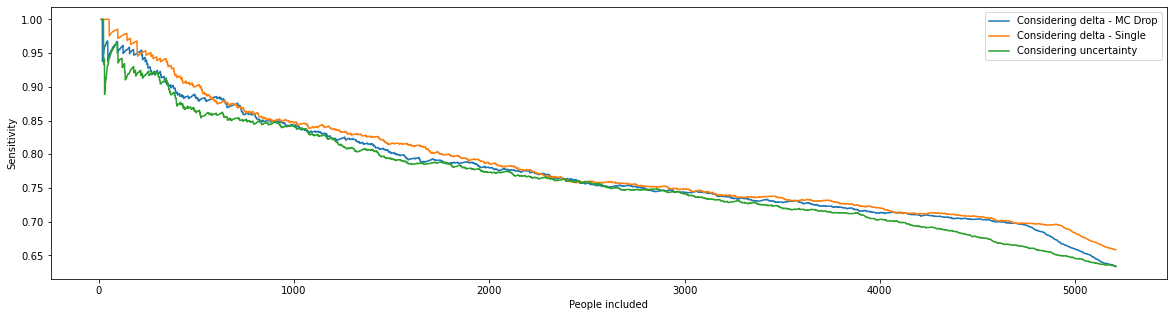

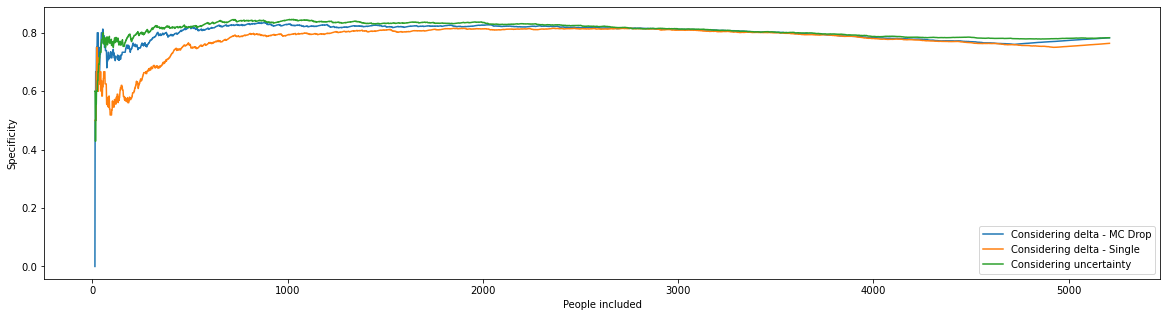

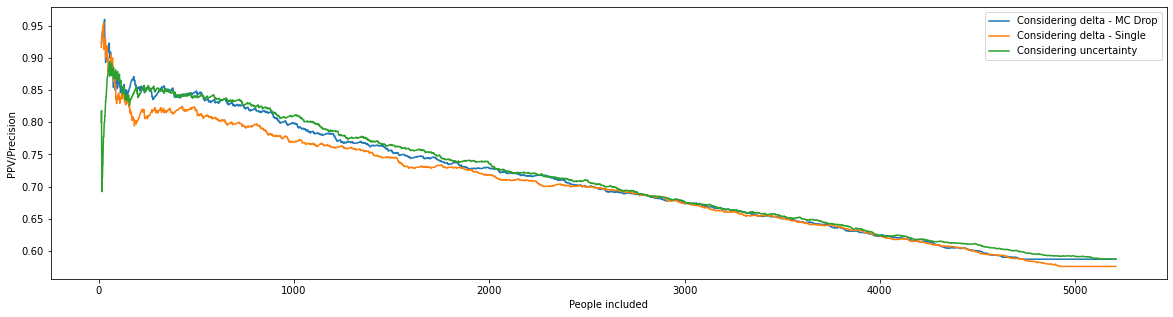

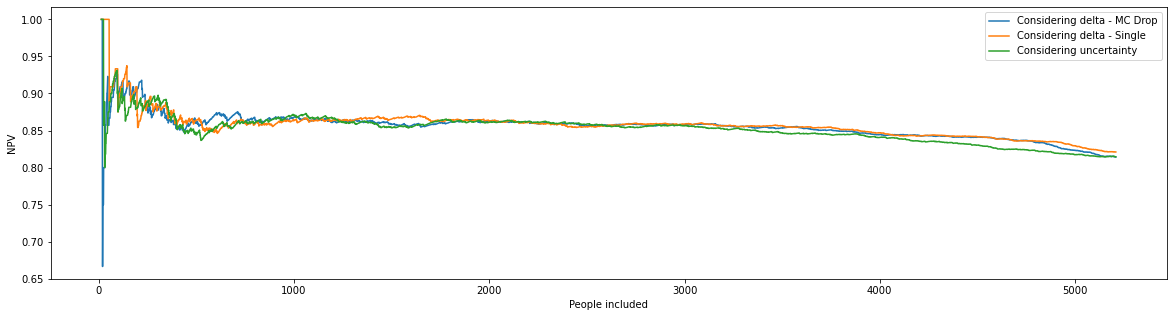

CPU times: user 1min 56s, sys: 84 ms, total: 1min 56s
Wall time: 1min 56s


In [11]:
%%time
plot_all_comparisons(joined_df, single_pass, threshold=0.582169, starting_num_people=13)